In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten,  MaxPooling2D, Conv2D
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt

Using TensorFlow backend.


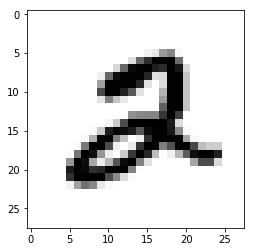

In [14]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

digit = X_train[5]
# digit
# digit.shape # (28, 28)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

X_train /= 255
X_test /= 255

n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

(28, 28, 1)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)) )
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())          
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
tensor_board = TensorBoard('./logs/LeNet-MNIST-1')

In [7]:
model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,
          validation_data=(X_test,y_test), callbacks=[tensor_board])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 113us/step - loss: 0.2405 - acc: 0.9265 - val_loss: 0.0531 - val_acc: 0.9821
Epoch 2/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0854 - acc: 0.9748 - val_loss: 0.0402 - val_acc: 0.9867
Epoch 3/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0624 - acc: 0.9813 - val_loss: 0.0323 - val_acc: 0.9895
Epoch 4/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0520 - acc: 0.9842 - val_loss: 0.0316 - val_acc: 0.9901
Epoch 5/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0448 - acc: 0.9862 - val_loss: 0.0289 - val_acc: 0.9905
Epoch 6/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0375 - acc: 0.9880 - val_loss: 0.0265 - val_acc: 0.9913
Epoch 7/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0325 - acc: 0.9894 - val_loss: 0.0287 - val_ac